In [ ]:
###################### STEP1 : EDA ######################

In [51]:
import pandas as pd
n_rows = 300000
df = pd.read_csv('train.csv',nrows=n_rows)
df.columns

Index(['id', 'click', 'hour', 'C1', 'banner_pos', 'site_id', 'site_domain',
       'site_category', 'app_id', 'app_domain', 'app_category', 'device_id',
       'device_ip', 'device_model', 'device_type', 'device_conn_type', 'C14',
       'C15', 'C16', 'C17', 'C18', 'C19', 'C20', 'C21'],
      dtype='object')

In [52]:
df.head()

,id,click,hour,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,app_category,device_id,device_ip,device_model,device_type,device_conn_type,C14,C15,C16,C17,C18,C19,C20,C21
0,1.000009e+18,0,14102100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,07d7df22,a99f214a,ddd2926e,44956a24,1,2,15706,320,50,1722,0,35,-1,79
1,1.000017e+19,0,14102100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,07d7df22,a99f214a,96809ac8,711ee120,1,0,15704,320,50,1722,0,35,100084,79
2,1.000037e+19,0,14102100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,07d7df22,a99f214a,b3cf8def,8a4875bd,1,0,15704,320,50,1722,0,35,100084,79
3,1.000064e+19,0,14102100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,07d7df22,a99f214a,e8275b8f,6332421a,1,0,15706,320,50,1722,0,35,100084,79
4,1.000068e+19,0,14102100,1005,1,fe8cc448,9166c161,0569f928,ecad2386,7801e8d9,07d7df22,a99f214a,9644d0bf,779d90c2,1,0,18993,320,50,2161,0,35,-1,157


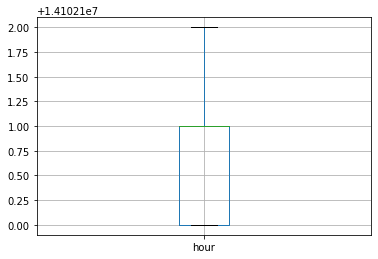

In [54]:
df1 = pd.DataFrame(df.hour, columns=['hour'])
df1.boxplot(column=['hour'])

In [20]:
 #drop unwanted columns
X = df.drop(['click', 'id', 'hour', 'device_id', 'device_ip'], axis=1)
# Encode categorical variables
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(handle_unknown='ignore')
X_enc =enc.fit_transform(X)
X_enc.shape

(300000, 8559)

In [29]:
#Split the data into train and test datasets
X = X_enc
y = df['click'].values
n_train = 270000
X_train = X[:n_train]
X_test = X[n_train:]
y_train = y[:n_train]
y_test = y[n_train:]

In [30]:
df['click'].value_counts()

0    248789
1     51211
Name: click, dtype: int64

In [ ]:
###################### STEP2 : EDA ######################

In [31]:
from sklearn.linear_model import SGDClassifier
sgd= SGDClassifier(loss='log', penalty=None, fit_intercept=True, learning_rate='constant', eta0=0.01)
sgd.fit(X_train,y_train)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.01, fit_intercept=True,
              l1_ratio=0.15, learning_rate='constant', loss='log',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty=None,
              power_t=0.5, random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [ ]:
################ STEP3 : Result analysis ########################

In [56]:
from sklearn.metrics import roc_auc_score
y_pred =sgd.predict_proba(X_test)[:, 1]
from sklearn.metrics import roc_auc_score
print('The ROC AUC on testing set is:{0:.3f}'.format(roc_auc_score(y_test, y_pred)))

The ROC AUC on testing set is:0.766


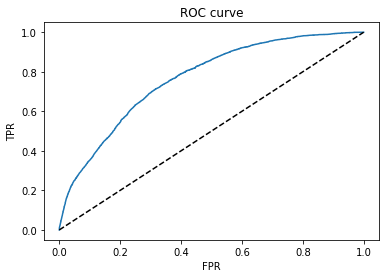

In [63]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve
FPR,TPR,_ = roc_curve(y_test,y_pred)
plt.plot(FPR,TPR)
plt.plot([0,1],[0,1],'--',color='black')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.show()


Text(0.5, 33.0, 'actual')

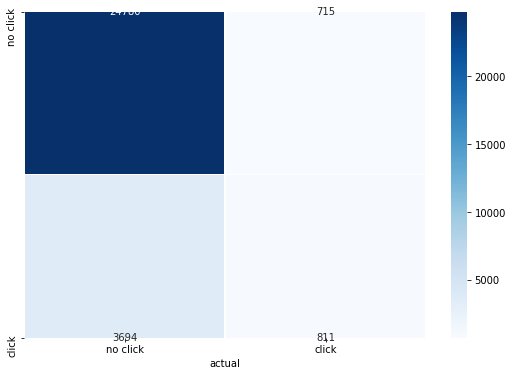

In [87]:
y_pred1 =sgd.predict(X_test)
from sklearn.metrics import confusion_matrix
con =confusion_matrix(y_test,y_pred1)
import seaborn as sns
fig, cf = plt.subplots(figsize=(9,6))
cf= sns.heatmap(con,xticklabels=['no click','click'], annot=True, fmt="d", linewidths=.5, yticklabels=['no click','click'],cmap='Blues')
cf.set_xlabel('predicted')
cf.set_xlabel('actual')

In [88]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

           0       0.87      0.97      0.92     25495
           1       0.53      0.18      0.27      4505

    accuracy                           0.85     30000
   macro avg       0.70      0.58      0.59     30000
weighted avg       0.82      0.85      0.82     30000



In [95]:
from sklearn.metrics import accuracy_score
print('accuracy score : {0:.2f}%'.format(accuracy_score(y_test, y_pred1)*100))

accuracy score : 85.30%
